<style>       
    hr{
        height: 4px;
        background-color: rgb(247,148,9);
        border: none;
    }
</style>
<div style="color=white;
           display:fill;
           border-radius:5px;
           background-color:rgb(34,41,49)">
<hr>
<div align="right"><i>COM500 - Statistical Signal and Data Processing &nbsp;</i></div>
<div align="right">Andrea Ridolfi, EPFL &nbsp;</div>

# Numerical Exercise: Smooth Spectrum & Heart Rate Variabiliy
<hr>
</div>

Heart Rate Variability (HRV) is defined as the physiological phenomenon of variation in the time interval between heartbeats, the so called RR intervals.
Indeed, even on very short periods of time, the interval between heart beats, and consequently the heart rate, is not constant. What we usually measure as heart rate is actually the average heart rate.
The figure below depicts a standard shape of an electrocardiogram signal (ECG) with two normal heart beats (sinus rhythm) and the RR interval between them (on the left), and the main components of a normal heart beat (sinus rhythm) in an electrocardiogram (right).

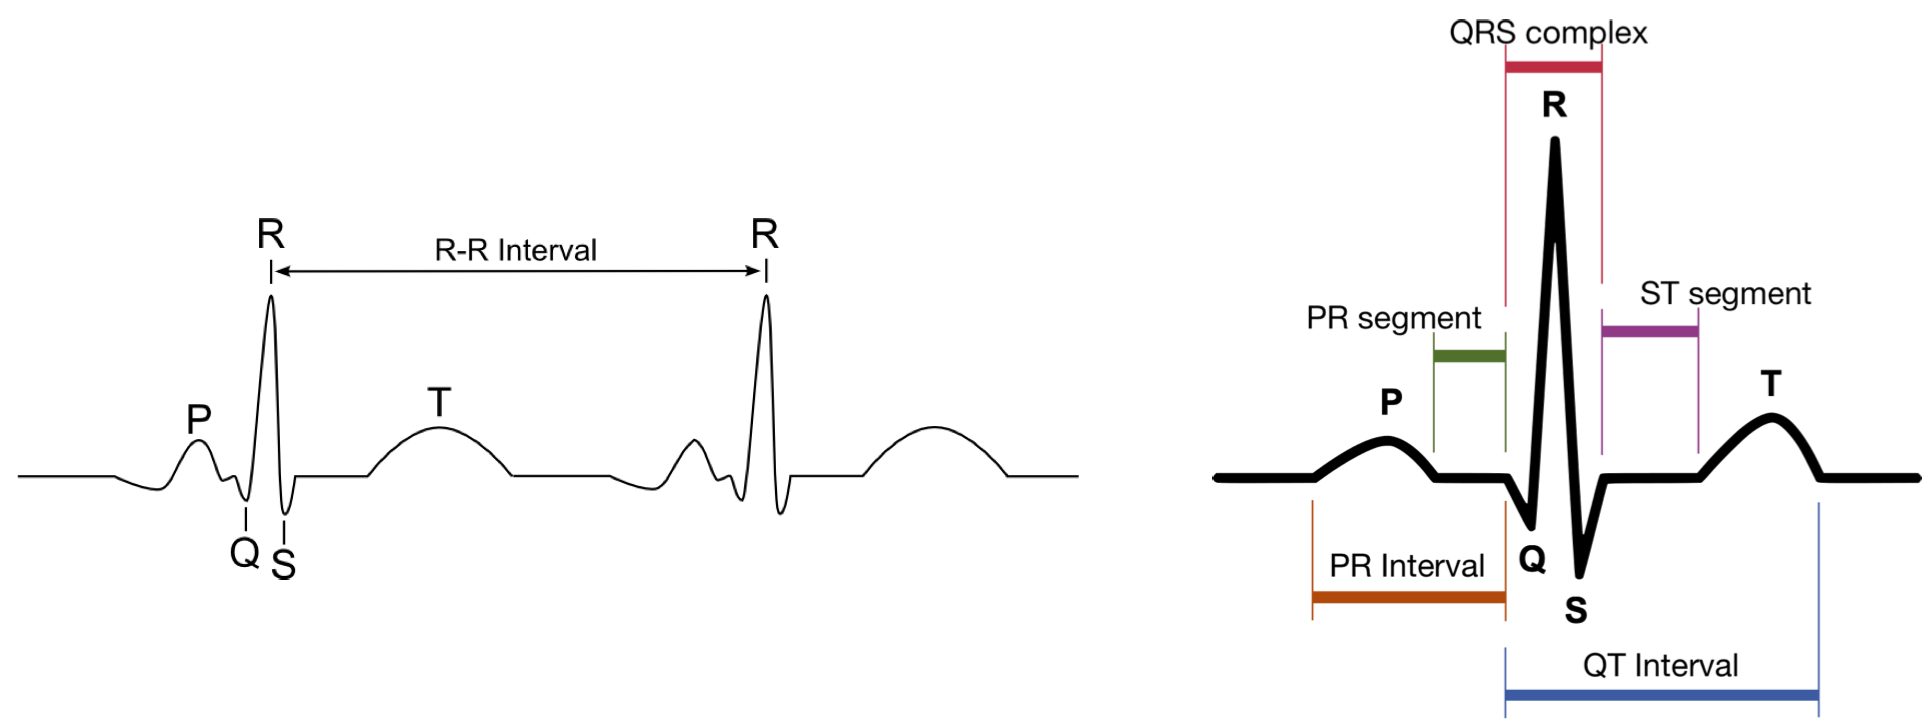

The HRV contains important information about the cardiovascular as well as the general health of a person.
The subcomponent of the central nervous system responsible of the involuntary functions is called Automatic Nervous System (ANS). It is composed of two branches, the Parasympathetic Nervous System and the Sympathetic Nervous System, each working in opposing directions to maintain a balanced state of control over internal organs. Parasympathetic restricts or slows down how organs function, i.e., slows down heart beat, and the Sympathetic increases or speeds up the same organs, i.e., speed up heart beat.
A healthy body that is able to respond quickly to demands will have a very active parasynpathethic and sympathetic systems, trying hard to preserve the equilibrium. This corresponds to a high variance between heart beats.
On the contrary, a reduced heart rate variability reflects a stressed or tired body, e.g., due to sickness or high volume exercise.

## Spectral Analysis and Heart Rate Variability
By taking a look at the variance of the RR signal,i.e., the energy of the spectrum of the RR signal, one can obtain information on the general rest status of a person. A detailed spectral analysis, well beyond the simple energy computation, provides more insight on his health. Specifically, spectral analysis of heart beat intervals (RR) is typically used to estimate the effect of the sympathetic and parasympathetic modulation, and the balance between these two branches of the Automatic Nervous System.
The sympatetic activity is believed to influence the 0.04 to 0.15 Hz component of the spectrum (LF band) while both sympathetic and parasympathetic activity have an effect on the 0.15 to 0.4 Hz component (HF band).
The ratio of the power contained in the LF and HF components has been used as a measure of the balance between the effects of the sympathetic and parasympathetic systems.

## Analyzing the Heart Rate Variability
We now proceed to the spectral analysis of the RR signal. The spectrum of a RR signal is a smooth one and can be approximated by a rational spectrum, that is, by the spectrum of an AR model.
We shall present the spectral estimation obtained using the periodogram, simple but not exploiting the smooth information, and using an AR model.
First of all, load the RR signal contained in the file rrSignal.csv (Moodle).
Notice that the RR intervals are measured in milliseconds, therefore we convert them into seconds

In [2]:
import numpy as np
import scipy.signal as ssig
import matplotlib.pyplot as plt

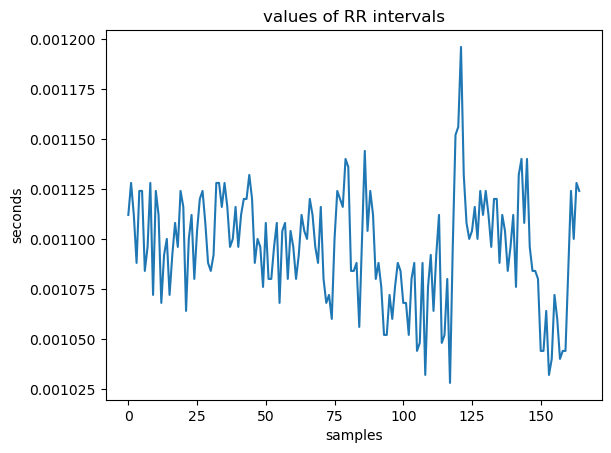

In [3]:
rrSignal=np.genfromtxt('rrSignal.csv', delimiter=',')
N=len(rrSignal)
rrSignal = rrSignal/1000
fig, ax = plt.subplots()
ax.set_title("values of RR intervals")
plt.plot(rrSignal)
plt.xlabel('samples')
plt.ylabel('seconds');

Since we are interested in analyzing the RR signal for strictly positive frequencies $f > 0$ Hz, we get rid of the DC ($f = 0$ Hz) component.

In [4]:
meanRR=np.mean(rrSignal)
rrSignal0=rrSignal-meanRR
# plt.plot(rrSignal0)

Notice that $60/\texttt{meanRR}$ gives the average heart beat per minute.

Before tackling the spectral analysis we need to make a comment on the frequency representation of a RR signal. Indeed, notice that the RR samples do not have regularly spaced timestamps since they are not the result of a regular sampling of a continuous signal, but a time measurement between the R "peaks" of the (analog) ECG signal. It has been however shown that approximating the interval between two timestamps (R peaks) with the average interval  (here $\texttt{meanRR}$) does not affect the medical information that can be inferred from the spectrum. Therefore we can assume the "sampling frequency" to be $f_s=1/\texttt{meanRR}$ Hz.

Let's start our spectral analysis, by defining the frequency (and normalize frequency) axis.

In [5]:
dataSize=rrSignal0.size
freqNorm = np.arange(0,dataSize) / dataSize
freqHertz=freqNorm / meanRR;

Then, compute the periodogram.

Text(0.5, 0, 'normalized frequencies')

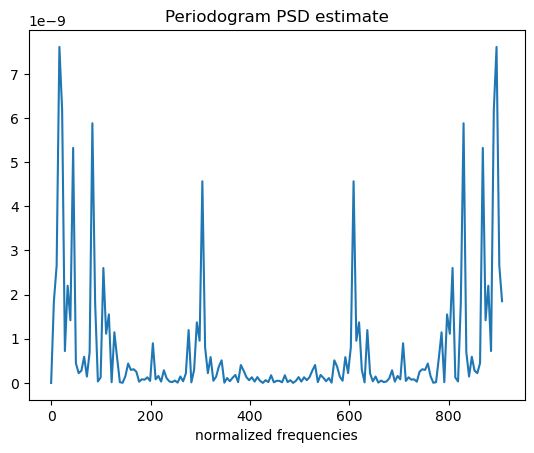

In [6]:
freqs , Sper = ssig.periodogram(rrSignal0, fs=1.0, return_onesided=False)  
N = len(Sper)
fs = 1/meanRR
freqsNorm = np.arange(0,N)/N * fs
fig, ax = plt.subplots()
# plt.plot(freqNorm,Pxx)
plt.plot(freqsNorm,Sper);
ax.set_title("Periodogram PSD estimate")
plt.xlabel('normalized frequencies')
# plt.ylabel('seconds') 

Now, compute the AR based smooth spectrum estimate. We assume the AR order to be $8$ (can you guess the order form the periodogram plot?).

Text(0.5, 0, 'normalized frequencies')

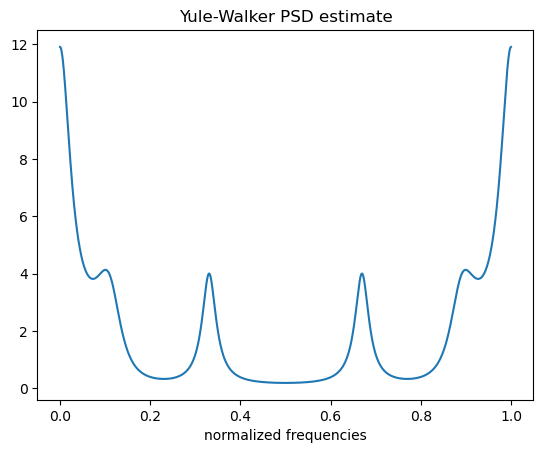

In [7]:
import statsmodels.regression as smr
orderAR = 8
NFFT = 4096
p, sigma = smr.linear_model.yule_walker(rrSignal0, order = orderAR)
a=np.concatenate(([1], -p))
Syw = 1/(np.abs(np.fft.fft(a,NFFT))**2)
freqsNorm=np.arange(0,NFFT)/NFFT
fig, ax = plt.subplots()
plt.plot(freqsNorm,Syw)
ax.set_title("Yule-Walker PSD estimate")
plt.xlabel('normalized frequencies')